# PyTesseract

#### install libraries

In [2]:
# Install PyTesseract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,325 kB/s)
debconf: unable to initi

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images 
#!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
#!unzip -qq OCRSamples.zip

#### First Try

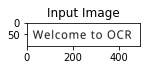

PyTesseract Extracted: Welcome to OCR



In [3]:
img = cv2.imread('/content/OCR Samples/OCR1.png')
imshow("Input Image", img)

#Passing image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

#### White Text on Black Background

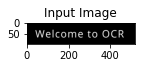

Pytesseract Extracted: Welcome to OCR



In [4]:
img = cv2.imread('OCR Samples/OCR2.png')
imshow("Input Image", img)

output_txt = pytesseract.image_to_string(img)

print("Pytesseract Extracted: {}".format(output_txt))

#### Messy Background

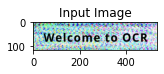

PyTesseract Extracted:  



In [5]:
img = cv2.imread('OCR Samples/OCR3.png')
imshow("Input Image", img)

output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

#### Real Scan

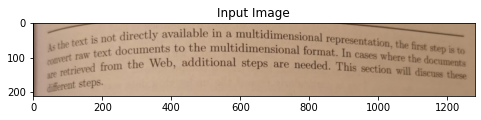

Pytesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [6]:
img = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

output_txt = pytesseract.image_to_string(img)

print("Pytesseract Extracted: {}".format(output_txt))

#### Cleaning up the Images

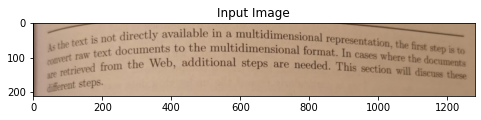

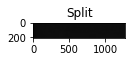

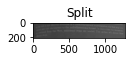

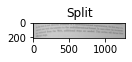

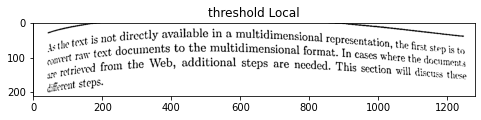

PyTesseract Extracted: j a j multidimensional r
irectly available in a 4
ne text is not direct nts to the multidimensional form,
Ath aw text fo Web, additional steps are necde
‘onl

Cpresentation, the first step is to
at. In cases where the documents

d. This section will discuss these
convert r

are ret rieved fr
diferent StePS-



In [7]:
from skimage.filters import threshold_local

image = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

H = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[0]
S = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[1]
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]

imshow("Split", H)
imshow("Split", S)
imshow("Split", V)

T = threshold_local(V, 25, offset = 15, method="gaussian")

thresh = ( V > T).astype("uint8") * 255
imshow("threshold Local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

# Thresholding

Good practices for OCR Recognition

* Bluring
* Thresholding
* Deskewing
* Dilaiton / Erosion / Opening / Closing
* Noise Removal

In [8]:
# Get our new test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2022-10-19 15:39:10--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2022-10-19 15:39:11--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.01s   

2022-10-19 15:39:11 (6.57 MB/s) - ‘Receipt-woolworth.jpg’ s

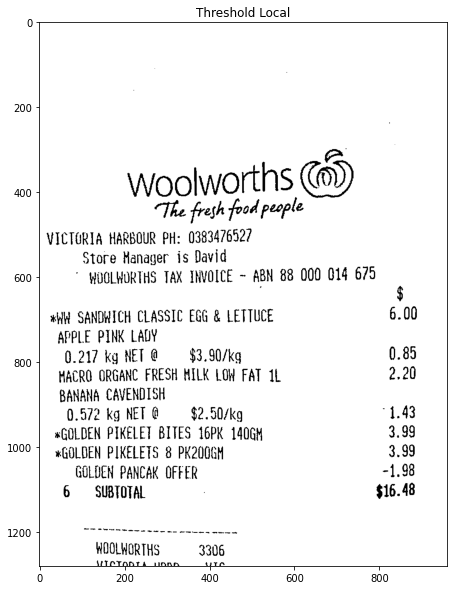

PyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [9]:
from skimage.filters import threshold_local

image = cv2.imread('Receipt-woolworth.jpg')

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset = 15, method="gaussian")

thresh = (V>T).astype("uint8") * 255
imshow("Threshold Local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [10]:

from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Using dictionary we can get each word detected, their bounding box information, the text in them and the confidence scores for each

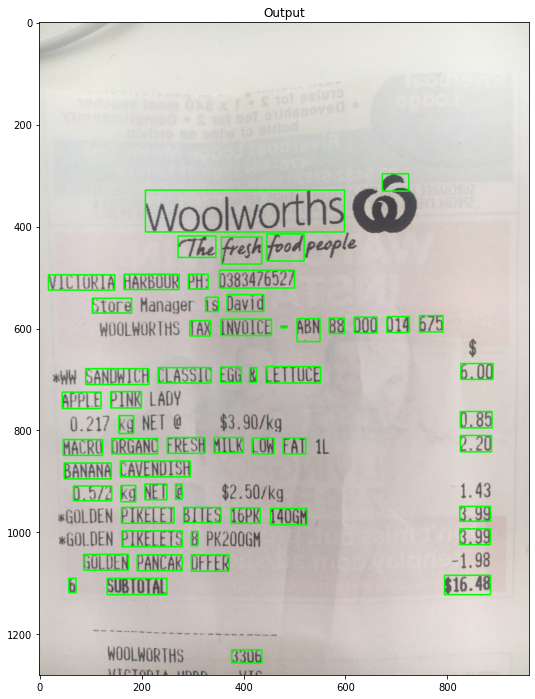

In [11]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', image, size = 12)

#### Easy OCR

In [12]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 604 kB 55.8 MB/s 
     |████████████████████████████████| 47.6 MB 1.7 MB/s 
     |████████████████████████████████| 120 kB 59.6 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


--2022-10-19 15:41:39--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2022-10-19 15:41:39--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91841 (90K) [image/jpeg]
Saving to: ‘whatsapp_conv.jpeg’

whatsapp_conv.jpeg  100%[===================>]  89.69K  --.-KB/s    in 0.01s   

2022-10-19 15:41:39 (6.44 MB/s) - ‘whatsapp_conv.jpeg’ saved [91841/918

In [13]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 17.6 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60


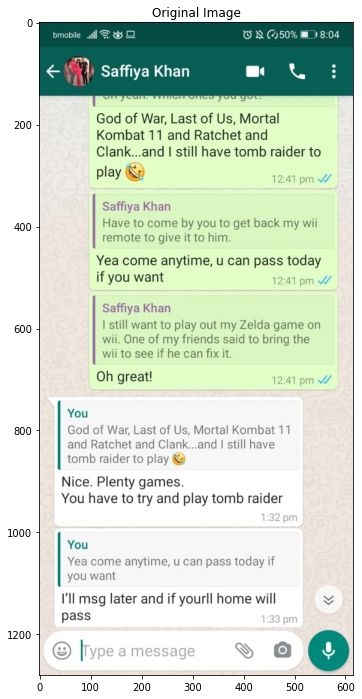

Detecting and OCR'ing text from input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteCompleted in 20.438613891601562 seconds


In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# load the input image from disk
image = cv2.imread("whatsapp_conv.jpeg")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [2]:
results

[([[24, 12], [192, 12], [192, 38], [24, 38]],
  'bmobile _ill < 82',
  0.12457802840124284),
 ([[396, 12], [510, 12], [510, 38], [396, 38]],
  '"\'0 ^ (50%',
  0.3369437989007717),
 ([[546, 12], [594, 12], [594, 36], [546, 36]], '8.04', 0.9920759797096252),
 ([[114, 74], [302, 74], [302, 122], [114, 122]],
  'Saffiya Khan',
  0.7756983803537445),
 ([[110, 174], [200, 174], [200, 204], [110, 204]],
  'God of',
  0.9911833572848934),
 ([[254, 173], [476, 173], [476, 206], [254, 206]],
  'Last of Us, Mortal',
  0.908146954391923),
 ([[110, 206], [454, 206], [454, 238], [110, 238]],
  'Kombat 11 and Ratchet and',
  0.859354745826267),
 ([[110, 240], [250, 240], [250, 270], [110, 270]],
  'Clank__and',
  0.7085109262712401),
 ([[264, 238], [558, 238], [558, 270], [264, 270]],
  'still have tomb raider to',
  0.9720005937874658),
 ([[107, 279], [167, 279], [167, 315], [107, 315]],
  'play',
  0.8657418620480265),
 ([[452, 294], [544, 294], [544, 322], [452, 322]],
  '12.41 pm',
  0.984380966

 Probability of Text: 12.458% OCR'd Text: bmobile _ill < 82
 Probability of Text: 33.694% OCR'd Text: "'0 ^ (50%
 Probability of Text: 99.208% OCR'd Text: 8.04
 Probability of Text: 77.570% OCR'd Text: Saffiya Khan
 Probability of Text: 99.118% OCR'd Text: God of
 Probability of Text: 90.815% OCR'd Text: Last of Us, Mortal
 Probability of Text: 85.935% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 70.851% OCR'd Text: Clank__and
 Probability of Text: 97.200% OCR'd Text: still have tomb raider to
 Probability of Text: 86.574% OCR'd Text: play
 Probability of Text: 98.438% OCR'd Text: 12.41 pm
 Probability of Text: 99.971% OCR'd Text: Saffiya Khan
 Probability of Text: 58.658% OCR'd Text: Have to come by you to get back my wii
 Probability of Text: 55.833% OCR'd Text: remote to give it to him:
 Probability of Text: 77.152% OCR'd Text: Yea come anytime, U can pass today
 Probability of Text: 69.669% OCR'd Text: if you want
 Probability of Text: 72.726% OCR'd Text: 12.41 pm
 P

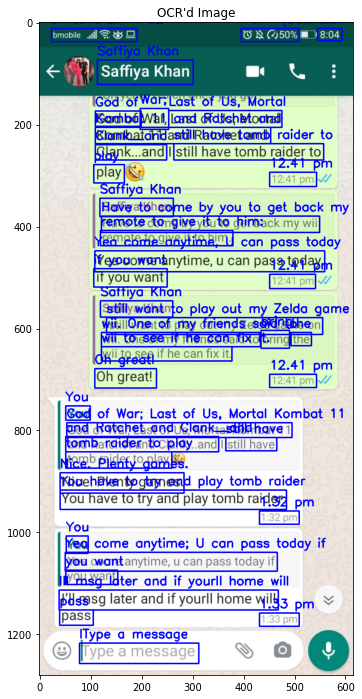

In [3]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)